### importing the libraries

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns

### Loading Dataset

In [128]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab Notebooks/Hackthon-Prudent /tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [130]:
df.shape

(20491, 2)

In [131]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [132]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

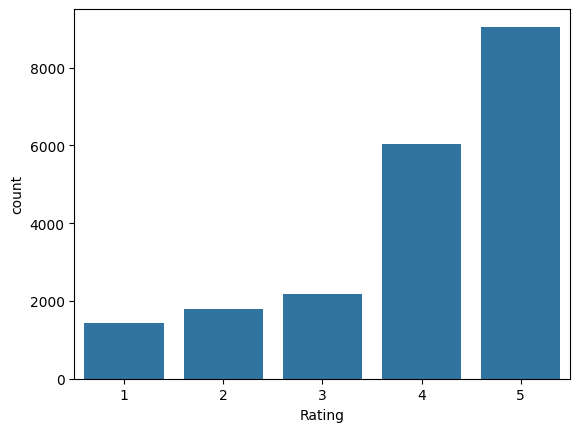

In [133]:
sns.countplot(x='Rating',data=df)

In [134]:
df = df[df.Rating != 3]
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5


### Converting the Rating Column numerical(1,2,3,4,5) to  sentiment as Postive , Negative Or Neutral

In [135]:
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    4: 'Positive',
    5: 'Positive'
}

# Convert numerical values in Rating to sentiment labels
df['Sentiment'] =df['Rating'].map(sentiment_mapping)

In [136]:
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive
5,love monaco staff husband stayed hotel crazy w...,5,Positive


In [137]:
df.drop(['Rating'], axis=1,inplace=True)

In [138]:
df.head()

,Review,Sentiment
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive
5,love monaco staff husband stayed hotel crazy w...,Positive


In [139]:
df["Sentiment"].value_counts()

Sentiment
Positive    15093
Negative     3214
Name: count, dtype: int64

In [140]:
#checking the Duplicates
df[df.duplicated()]

,Review,Sentiment


In [141]:
from wordcloud import  WordCloud
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


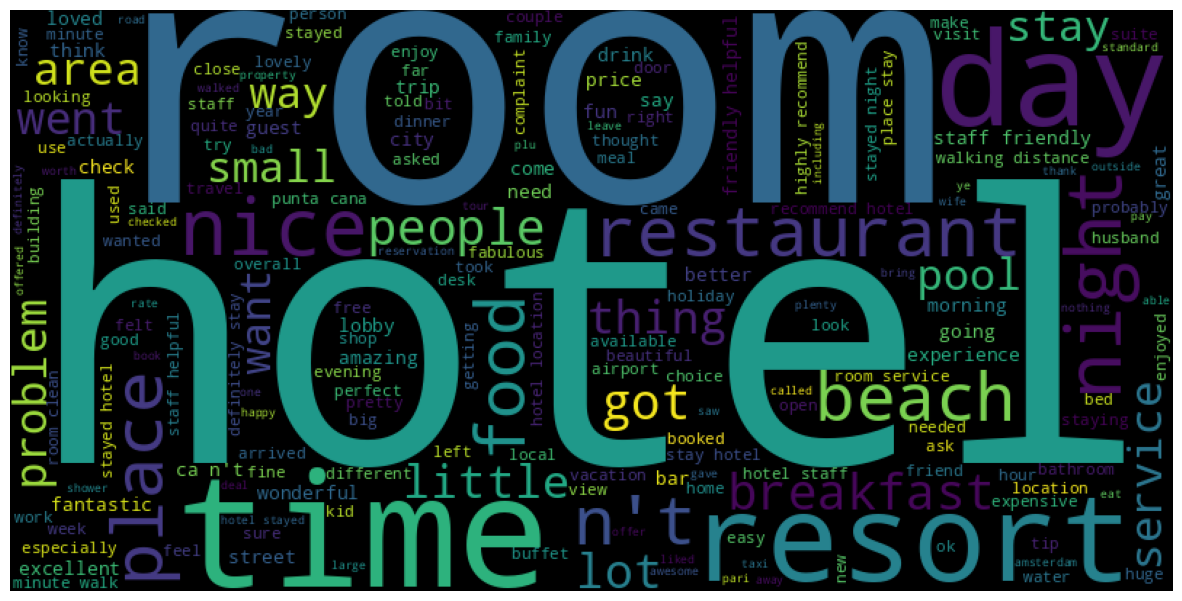

In [142]:
#creating a dataframe for positive sentiments
df_positive=df.loc[df["Sentiment"]=="Positive",:]

#joining the positive sentences
words=" ".join(df_positive["Review"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","really","good","best","br"]])
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=800,
                      height=400
                     ).generate(cleaned_words)
plt.figure(1,figsize=(15,10))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

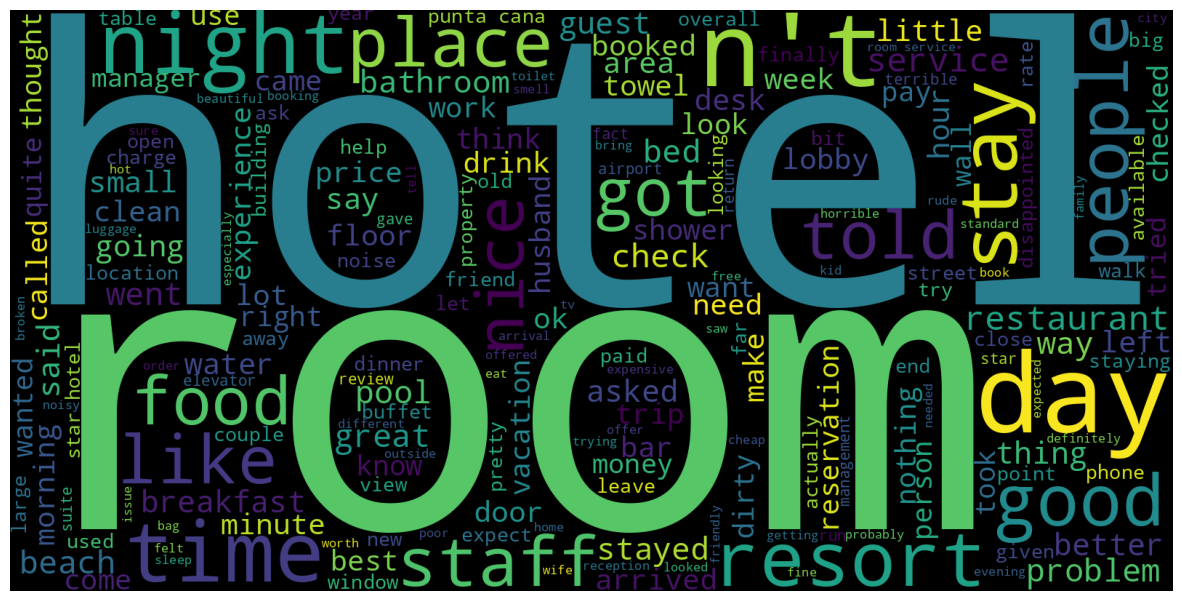

In [143]:
#creating a dataframe for negative sentiments
df_negative=df.loc[df["Sentiment"]=="Negative",:]

#joining the negative sentences
words=" ".join(df_negative["Review"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["hate","bad","worst","really","br"]])
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words)
plt.figure(1,figsize=(15,10))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

# splitting input and output variables


In [144]:
X=df[['Review']]
y=df['Sentiment']

## Spliting the Data into Train and test

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [146]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [147]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

###Text Cleaning

In [148]:
# Define preprocess function
def preprocess(text, flag):
    # remove special characters
    sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # convert sentence into lower case
    sentence = sentence.lower()
    # tokenize sentence into words
    tokens = sentence.split()
    # remove stop words
    clean_tokens = [token for token in tokens if token not in stopwords.words("english")]
    # stemming/lemmatization
    if flag == 'stem':
        clean_tokens = [stemmer.stem(token) for token in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
    return pd.Series(' '.join(clean_tokens))

In [149]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [150]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [151]:
# Apply preprocess function to 'review' column in DataFrame
X_train_transformed= X_train['Review'].progress_apply(lambda x: preprocess(x, flag='lemma'))
X_train_transformed.head()

100%|██████████| 13730/13730 [04:06<00:00, 55.67it/s]


,0
4765,ok stayed night january room small european st...
19710,great location exploring city fantastic locati...
16245,good service great location fantastic pool sup...
17075,fabulous wedding went group let start saying i...
39,average nice stay hotel amazing location great...


In [152]:
X_train_transformed.columns = ['clean_review']
X_train_transformed.head()

,clean_review
4765,ok stayed night january room small european st...
19710,great location exploring city fantastic locati...
16245,good service great location fantastic pool sup...
17075,fabulous wedding went group let start saying i...
39,average nice stay hotel amazing location great...


# **##Converting the Text to numerical Vectors - BOW Representation**

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
vocab=CountVectorizer()

In [154]:
X_train_bow = vocab.fit_transform(X_train_transformed['clean_review'])

In [155]:
len(vocab.vocabulary_)

36555

In [156]:
print("shape of input data", X_train_bow.shape)

shape of input data (13730, 36555)


### Pre_Precossing on Text Data

In [157]:
X_test

,Review
14692,"wonderful hotel, sister stayed affinia enjoyed..."
6935,loved vacation just returned stay excellence-6...
18025,great location fabulous staff moment walked ho...
4764,"faultless, just returned long weekend london p..."
18995,fabulous hotel booked stay hilton website got ...
...,...
6105,believe awful reviews site hotel absolutely aw...
8364,"loved favourite hotels love, small trendy clea..."
5010,"ca n't beat, family run hotel gem great place ..."
2076,great hotel decent service stayed ritz group 4...


In [158]:
X_test_transformed = X_test['Review'].progress_apply(lambda x: preprocess(x, flag='lemma'))
X_test_transformed.head()

100%|██████████| 4577/4577 [01:36<00:00, 47.59it/s]


,0
14692,wonderful hotel sister stayed affinia enjoyed ...
6935,loved vacation returned stay excellence night ...
18025,great location fabulous staff moment walked ho...
4764,faultless returned long weekend london pleasur...
18995,fabulous hotel booked stay hilton website got ...


In [159]:
X_test_transformed.columns = ['clean_review']
X_test_transformed.head()

,clean_review
14692,wonderful hotel sister stayed affinia enjoyed ...
6935,loved vacation returned stay excellence night ...
18025,great location fabulous staff moment walked ho...
4764,faultless returned long weekend london pleasur...
18995,fabulous hotel booked stay hilton website got ...


In [160]:
X_test_bow = vocab.transform(X_test_transformed['clean_review'])

In [161]:
X_test_bow.shape

(4577, 36555)

### Model Building

# **logistcis Regression**

In [174]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [175]:
log_model.fit(X_train_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
#prediction
y_test_pred = log_model.predict(X_test_bow)

In [177]:
#evaluation
log_model_bow_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of logistic regression model is: ",log_model_bow_accuracy)

Accuracy of logistic regression model is:  0.9523705483941446


In [179]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)

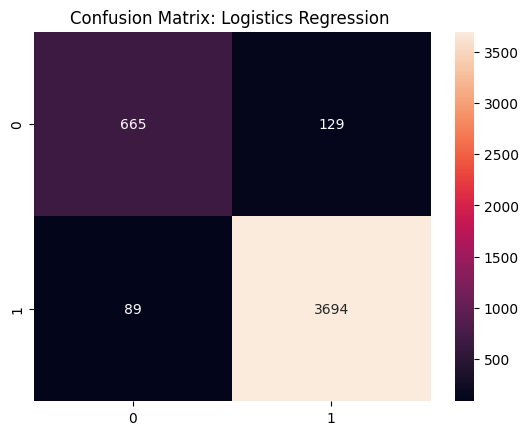

In [180]:
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: Logistics Regression ")
plt.show()


# **Decision Tree **

In [181]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [182]:
#prediction
y_test_pred = decision_tree_model.predict(X_test_bow)

In [183]:
#evaluation
decision_tree_model_bow_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of decision tree model is: ",decision_tree_model_bow_accuracy)

Accuracy of decision tree model is:  0.8804894035394363


In [185]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [186]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)

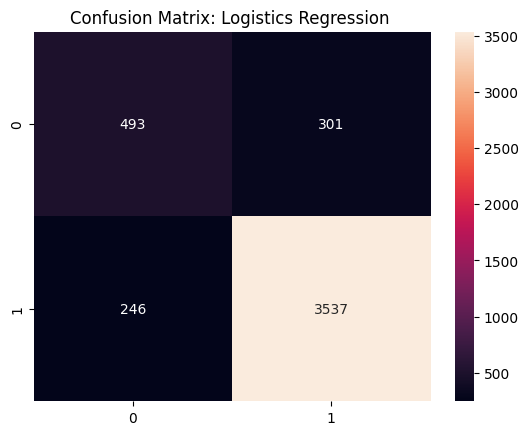

In [187]:
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: Logistics Regression ")
plt.show()


# **Support vector Machine**

In [200]:
# import and instantiate a Linear SVM model
from sklearn import svm
lrsvc = svm.LinearSVC()
lrsvc.fit(X_train_bow, y_train)

LinearSVC()

In [201]:
#predicition
y_test_pred = lrsvc.predict(X_test_bow)

In [204]:
#evaluation
SVMC_model_bow_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of random forest model is: ",SVMC_model_bow_accuracy)

Accuracy of random forest model is:  0.9449421018134149


In [205]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_pred)

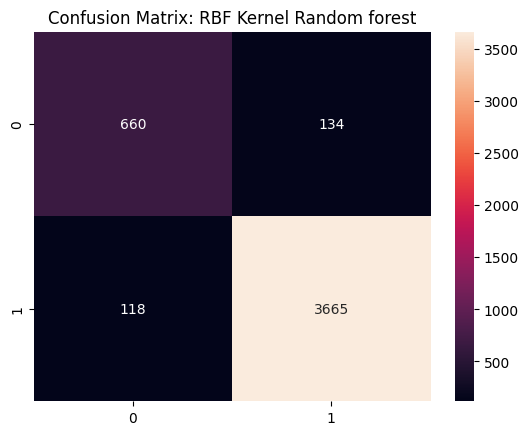

In [206]:
#ploting heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: RBF Kernel Random forest")
plt.show()


# **Random Forest**

In [188]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_bow, y_train)

RandomForestClassifier()

In [189]:
#predicition
y_test_pred = random_forest_model.predict(X_test_bow)

In [190]:
#evaluation
random_forest_model_bow_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of random forest model is: ",random_forest_model_bow_accuracy)

Accuracy of random forest model is:  0.8905396547957177


In [193]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_pred)

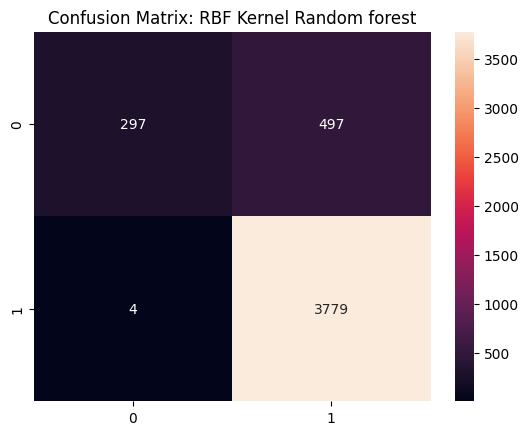

In [194]:
#ploting heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: RBF Kernel Random forest")
plt.show()


# **Comparing the BOW Technic Model Accuracy**


In [234]:
# using Bag of words:
data = {
    'Model Name': [ 'Logistic Regression', 'Decision Tree Classifier','Support Vector Machine', 'Random Forest Classifier'],
    'Accuracy': [0.9523705483941446, 0.8804894035394363, 0.9449421018134149, 0.8905396547957177]
}

bow_df = pd.DataFrame(data)
bow_df['Accuracy'] = bow_df['Accuracy'] * 100
bow_df.head()

,Model Name,Accuracy
0,Logistic Regression,95.237055
1,Decision Tree Classifier,88.048940
2,Support Vector Machine,94.494210
3,Random Forest Classifier,89.053965


# ##**Converting the Text to numerical Vectors - TF-IDF Representation**

In [196]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_dtm = vectorizer.fit_transform(X_train_transformed['clean_review'])

In [197]:
print(X_train_dtm)

  (0, 30709)	0.0430756181514567
  (0, 18984)	0.088448688306548
  (0, 18962)	0.12115369459684966
  (0, 15600)	0.03083055988258603
  (0, 28276)	0.25182168601049054
  (0, 25626)	0.11477900360190532
  (0, 14385)	0.09490569625088588
  (0, 35235)	0.16695677951374102
  (0, 28221)	0.10464031038252002
  (0, 30686)	0.08079621076798406
  (0, 33539)	0.13867037390067058
  (0, 31006)	0.1482625114067912
  (0, 8365)	0.12194408330497963
  (0, 14081)	0.06724369950158793
  (0, 27905)	0.09273820829567092
  (0, 25673)	0.07878500058177107
  (0, 12195)	0.0846631325941461
  (0, 22499)	0.12602548840993225
  (0, 27693)	0.1383637048326298
  (0, 18877)	0.04842236276687259
  (0, 15078)	0.05958961910453488
  (0, 29582)	0.12351654709454471
  (0, 7121)	0.10036262975299226
  (0, 33893)	0.1385165802784754
  (0, 12217)	0.09163344020535082
  :	:
  (13729, 26020)	0.14147011845031515
  (13729, 10317)	0.11283918276358754
  (13729, 35869)	0.11885825601014748
  (13729, 18871)	0.10996381740755976
  (13729, 9768)	0.235332602970

In [199]:
X_test_dtm=vectorizer.transform(X_test_transformed['clean_review'])

Building the Model using TF-IDF Technices

# **Logistics Regression**

In [207]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(X_train_dtm, y_train)

LogisticRegression()

In [208]:
#predicition
y_test_pred = LogisticRegression_model.predict(X_test_dtm)

In [209]:
#evaluation
LogisticRegression_model_dtm_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistics model is: ",LogisticRegression_model_dtm_accuracy)

Accuracy of Logistics model is:  0.9508411623334062


In [210]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_pred)

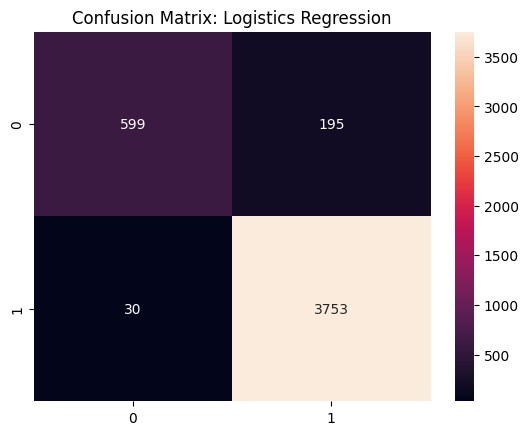

In [211]:
#ploting heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: Logistics Regression")
plt.show()


# **Decision Tree**

In [214]:
decision_tree_model_tf_idf = DecisionTreeClassifier()
decision_tree_model_tf_idf.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [216]:
#predicition[]
y_test_pred = decision_tree_model.predict(X_test_dtm)

In [217]:
#evaluation
decision_tree_model_dtm_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistics model is: ",decision_tree_model_dtm_accuracy)

Accuracy of Logistics model is:  0.827397858859515


In [218]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_pred)

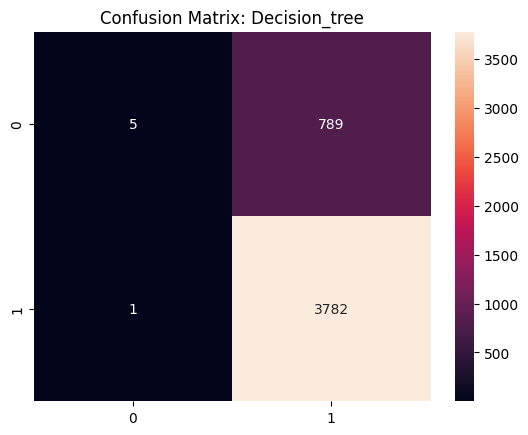

In [220]:
#ploting heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: Decision_tree")
plt.show()


# **Random Forest**

In [221]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_dtm, y_train)

RandomForestClassifier()

In [222]:
#predicition[]
y_test_pred = random_forest_model.predict(X_test_dtm)

In [224]:
#evaluation
random_forest_model_dtm_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistics model is: ",random_forest_model_dtm_accuracy)

Accuracy of Logistics model is:  0.8890102687349792


In [225]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_pred)

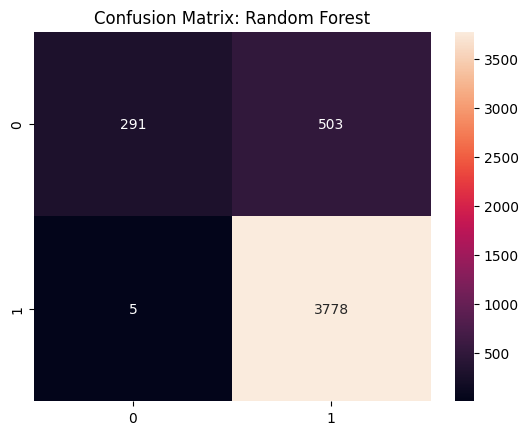

In [227]:
#ploting heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: Random Forest")
plt.show()


**Support Vector Machine**

In [228]:
# import and instantiate a Linear SVM model
from sklearn import svm
lrsvc = svm.LinearSVC()
lrsvc.fit(X_train_dtm, y_train)

LinearSVC()

In [229]:
#predicition[]
y_test_pred = lrsvc.predict(X_test_dtm)

In [230]:
#evaluation
SVMC_model_dtm_accuracy=accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistics model is: ",SVMC_model_dtm_accuracy)

Accuracy of Logistics model is:  0.9593620275289491


In [231]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_test_pred)

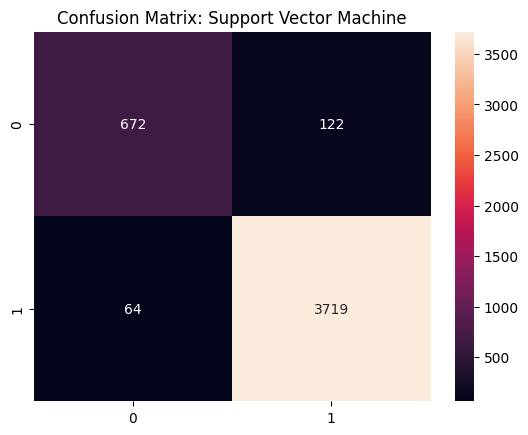

In [232]:
#ploting heatmap for confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix: Support Vector Machine")
plt.show()


# **Comparing the TF_IDF Technic Model Accuracy**

In [239]:
# using TF_IDF:
data = {
    'Model Name': [ 'Logistic Regression', 'Decision Tree Classifier','Support Vector Machine', 'Random Forest Classifier'],
    'Accuracy': [0.9508411623334062, 0.827397858859515,0.9593620275289491, 0.8890102687349792]
}

TF_IDF_df = pd.DataFrame(data)
TF_IDF_df['Accuracy'] = TF_IDF_df['Accuracy'] * 100
TF_IDF_df.head()

,Model Name,Accuracy
0,Logistic Regression,95.084116
1,Decision Tree Classifier,82.739786
2,Support Vector Machine,95.936203
3,Random Forest Classifier,88.901027
